In [2]:
import requests
import pandas as pd

In [7]:
url = "https://www.imdb.com/chart/top/"

In [8]:
page = requests.get(url)
print(page)

<Response [200]>


In [11]:
from bs4 import BeautifulSoup

In [14]:
soup = BeautifulSoup(page.text,'lxml')

In [15]:
soup.title

<title>IMDb Top 250 - IMDb</title>

In [16]:
soup.h1

<h1 class="header">Top Rated Movies</h1>

In [17]:
soup.a

<a href="/?ref_=nv_home"><svg class="ipc-logo WNY8DBPCS1ZbiSd7NoqdP" height="56" version="1.1" viewbox="0 0 64 32" width="98" xmlns="http://www.w3.org/2000/svg"><g fill="#F5C518"><rect height="100%" rx="4" width="100%" x="0" y="0"></rect></g><g fill="#000000" fill-rule="nonzero" transform="translate(8.000000, 7.000000)"><polygon points="0 18 5 18 5 0 0 0"></polygon><path d="M15.6725178,0 L14.5534833,8.40846934 L13.8582008,3.83502426 C13.65661,2.37009263 13.4632474,1.09175121 13.278113,0 L7,0 L7,18 L11.2416347,18 L11.2580911,6.11380679 L13.0436094,18 L16.0633571,18 L17.7583653,5.8517865 L17.7707076,18 L22,18 L22,0 L15.6725178,0 Z"></path><path d="M24,18 L24,0 L31.8045586,0 C33.5693522,0 35,1.41994415 35,3.17660424 L35,14.8233958 C35,16.5777858 33.5716617,18 31.8045586,18 L24,18 Z M29.8322479,3.2395236 C29.6339219,3.13233348 29.2545158,3.08072342 28.7026524,3.08072342 L28.7026524,14.8914865 C29.4312846,14.8914865 29.8796736,14.7604764 30.0478195,14.4865461 C30.2159654,14.2165858 30.30219

In [ ]:
soup.find_all('a') # not the best way to extract data

In [34]:
# select the target area in page
topmovies_data = soup.find('tbody', {'class':'lister-list'})

In [35]:
movielist = topmovies_data.find_all('tr')

In [36]:
len(movielist)

250

In [ ]:
# just for test
for row in movielist:
    name = row.find('td',{'class':'titleColumn'}).a.text
    year = row.find('span',{'class':'secondaryInfo'}).text
    rating = row.find('strong').text
    print(name,year,rating)

In [47]:
# FOR SAVING DATA
data = [] # blank list
for row in movielist:
    data.append({
    'name' : row.find('td',{'class':'titleColumn'}).a.text,
    'year' : int(row.find('span',{'class':'secondaryInfo'}).text[1:-1]), # remove first n last bracket
    'rating' : float(row.find('strong').text),
    })
output = pd.DataFrame(data)
output

,name,year,rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.1
2,The Godfather: Part II,1974,9.0
3,The Dark Knight,2008,9.0
4,12 Angry Men,1957,8.9
...,...,...,...
245,The Princess Bride,1987,8.0
246,De slag om Algiers,1966,8.0
247,Drishyam,2015,8.0
248,Fanny och Alexander,1982,8.0


In [48]:
output.to_csv('top_movies.csv')

In [49]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    250 non-null    object 
 1   year    250 non-null    int64  
 2   rating  250 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [ ]:
output = output.set_index('name')
output.rating.head(50).plot(kind='bar',figsize=(15,5))

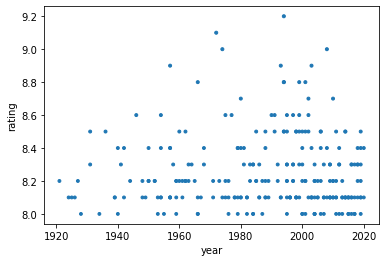

In [55]:
output.plot.scatter('year','rating',s='rating')

# Today final version

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [58]:
url = "https://www.imdb.com/chart/top/"
page = requests.get(url)
soup = BeautifulSoup(page.text,'lxml')
print(soup.title.text)
# select the target area in page
topmovies_data = soup.find('tbody', {'class':'lister-list'})
movielist = topmovies_data.find_all('tr')
print('movies found :',len(movielist))

# for data extraction
data = [] # blank list
for row in movielist:
    data.append({
    'name' : row.find('td',{'class':'titleColumn'}).a.text,
    'year' : int(row.find('span',{'class':'secondaryInfo'}).text[1:-1]), # remove first n last bracket
    'rating' : float(row.find('strong').text),
    })
output = pd.DataFrame(data)
output.to_csv('top_movies.csv')

IMDb Top 250 - IMDb
movies found : 250


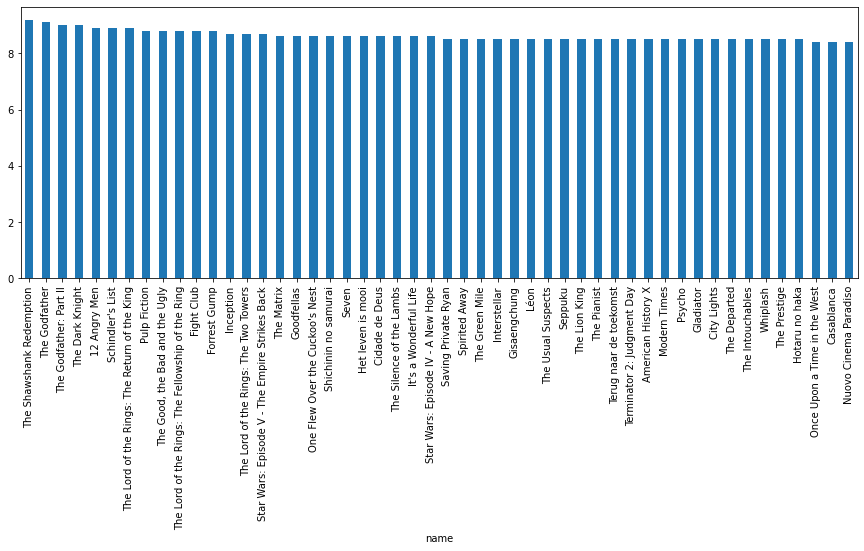

In [59]:
# top 50 graph
output = output.set_index('name')
output.rating.head(50).plot(kind='bar',figsize=(15,5))

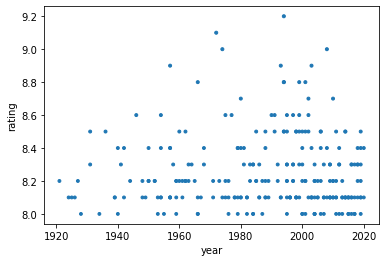

In [60]:
# year vs movies graph
output.plot.scatter('year','rating',s='rating')